<>:66: SyntaxWarning: invalid escape sequence '\k'
<>:67: SyntaxWarning: invalid escape sequence '\c'
<>:68: SyntaxWarning: invalid escape sequence '\k'
<>:79: SyntaxWarning: invalid escape sequence '\L'
<>:79: SyntaxWarning: invalid escape sequence '\s'
<>:85: SyntaxWarning: invalid escape sequence '\s'
<>:87: SyntaxWarning: invalid escape sequence '\L'
<>:90: SyntaxWarning: invalid escape sequence '\L'
<>:66: SyntaxWarning: invalid escape sequence '\k'
<>:67: SyntaxWarning: invalid escape sequence '\c'
<>:68: SyntaxWarning: invalid escape sequence '\k'
<>:79: SyntaxWarning: invalid escape sequence '\L'
<>:79: SyntaxWarning: invalid escape sequence '\s'
<>:85: SyntaxWarning: invalid escape sequence '\s'
<>:87: SyntaxWarning: invalid escape sequence '\L'
<>:90: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_2052373/1911444413.py:66: SyntaxWarning: invalid escape sequence '\k'
  axes[0].set_title('Concentration vs. Conductivity ($\kappa$)', fontsize=16, pad=15)
/tmp/ipykerne

計算結果摘要:
KCl 極限莫爾電導率 (Lambda^0_m): 156.7233 S cm^2 mol^-1
KCl 科爾勞施常數 (K): 135.4292
R-squared: 0.1928

數據表:
  Electrolyte  Concentration (M)  Sqrt_Concentration  Conductivity (S/cm)  \
0         KCl           0.020000            0.141421             0.002725   
1         KCl           0.005000            0.070711             0.000799   
2         KCl           0.001250            0.035355             0.000162   
3         KCl           0.000625            0.025000             0.000091   
4         KCl           0.000313            0.017678             0.000051   
5         KCl           0.000156            0.012500             0.000026   
0        KOAc           0.020000            0.141421             0.001496   
1        KOAc           0.005000            0.070711             0.000423   
2        KOAc           0.001250            0.035355             0.000095   
3        KOAc           0.000625            0.025000             0.000062   
4        KOAc           0.000313            0.0

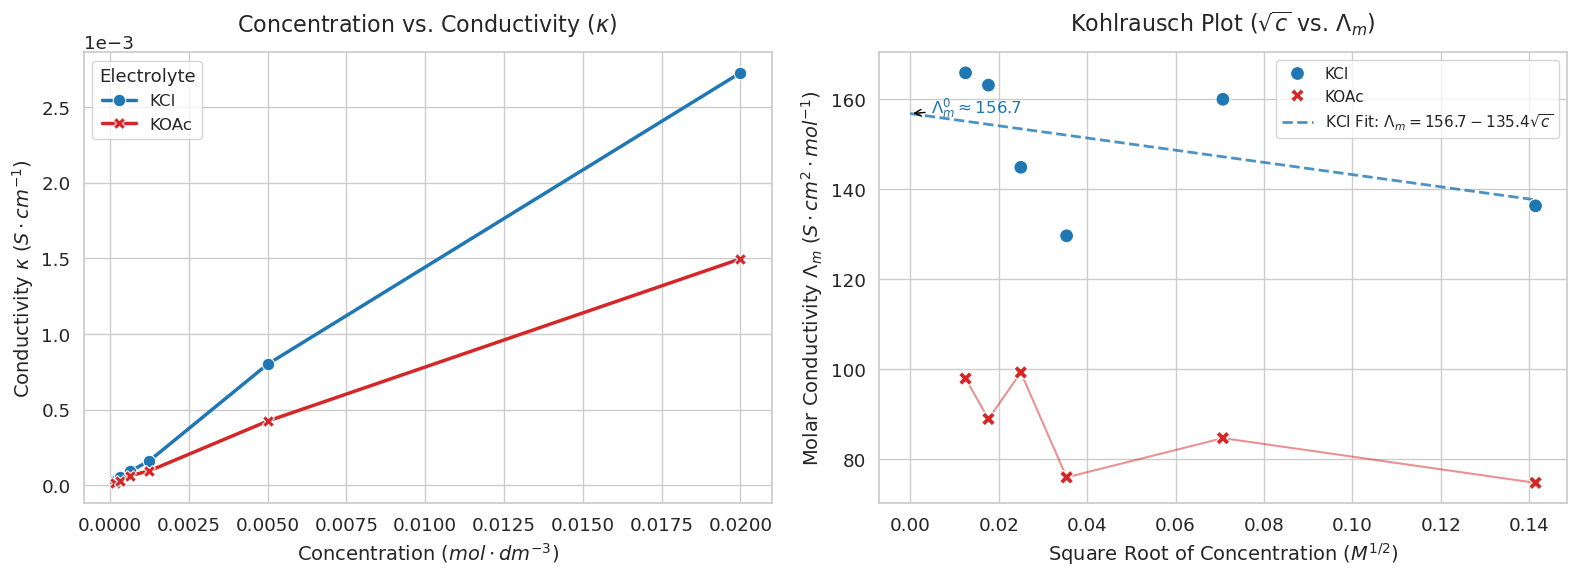

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 1. 數據準備 (使用前次數位化的數值)
# 濃度 (M)
conc = np.array([0.02, 0.005, 0.00125, 0.000625, 0.0003125, 0.00015625])

# KCl 電導度 (S/cm) - 轉換 mS 和 uS 為 S
# 2.725 mS -> 2.725e-3 S
kcl_kappa = np.array([2.725e-3, 0.7995e-3, 0.162e-3, 0.0905e-3, 50.95e-6, 25.9e-6])

# KOAc 電導度 (S/cm)
koac_kappa = np.array([1.4955e-3, 0.4235e-3, 0.095e-3, 62.05e-6, 27.8e-6, 15.3e-6])

# 2. 計算衍生數據
sqrt_c = np.sqrt(conc)

# 莫爾電導率 Lambda_m = (kappa * 1000) / c  (單位: S cm^2 mol^-1)
kcl_lambda = (kcl_kappa * 1000) / conc
koac_lambda = (koac_kappa * 1000) / conc

# 3. 線性回歸 (僅針對強電解質 KCl)
# 科爾勞施定律: Lambda_m = Lambda_0 - K * sqrt(c)
res = linregress(sqrt_c, kcl_lambda)
slope = res.slope
intercept = res.intercept
r_squared = res.rvalue**2

# 預測線 (用於作圖)
x_pred = np.linspace(0, max(sqrt_c), 100)
y_pred = intercept + slope * x_pred

# 4. 準備繪圖 DataFrame (Seaborn 友善格式)
df_kcl = pd.DataFrame({
    'Concentration (M)': conc,
    'Sqrt_Concentration': sqrt_c,
    'Conductivity (S/cm)': kcl_kappa,
    'Molar Conductivity': kcl_lambda,
    'Electrolyte': 'KCl'
})

df_koac = pd.DataFrame({
    'Concentration (M)': conc,
    'Sqrt_Concentration': sqrt_c,
    'Conductivity (S/cm)': koac_kappa,
    'Molar Conductivity': koac_lambda,
    'Electrolyte': 'KOAc'
})

df_all = pd.concat([df_kcl, df_koac])

# 5. 使用 Seaborn 繪圖
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2)
# 使用更美觀的調色盤
palette = {"KCl": "#1f77b4", "KOAc": "#d62728"} # Blue for KCl, Red for KOAc

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: 濃度 vs 電導度 ---
sns.lineplot(data=df_all, x='Concentration (M)', y='Conductivity (S/cm)', hue='Electrolyte', 
             style='Electrolyte', markers=True, dashes=False, ax=axes[0], palette=palette, linewidth=2.5, markersize=9)

axes[0].set_title('Concentration vs. Conductivity ($\kappa$)', fontsize=16, pad=15)
axes[0].set_xlabel('Concentration ($mol \cdot dm^{-3}$)', fontsize=14)
axes[0].set_ylabel('Conductivity $\kappa$ ($S \cdot cm^{-1}$)', fontsize=14)
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # 科學記號
axes[0].legend(title='Electrolyte', title_fontsize='13', fontsize='12')

# --- Plot 2: 根號濃度 vs 莫爾電導率 (Kohlrausch Plot) ---
# 繪製散點
sns.scatterplot(data=df_all, x='Sqrt_Concentration', y='Molar Conductivity', hue='Electrolyte', 
                style='Electrolyte', s=100, ax=axes[1], palette=palette, zorder=5)

# 繪製 KCl 回歸線
axes[1].plot(x_pred, y_pred, color=palette['KCl'], linestyle='--', alpha=0.8, linewidth=2, 
             label=f'KCl Fit: $\Lambda_m = {intercept:.1f} {slope:.1f}\sqrt{{c}}$')

# 連接 KOAc 的線 (為了視覺連貫性)
axes[1].plot(df_koac['Sqrt_Concentration'], df_koac['Molar Conductivity'], color=palette['KOAc'], 
             linestyle='-', alpha=0.5, linewidth=1.5)

axes[1].set_title('Kohlrausch Plot ($\sqrt{c}$ vs. $\Lambda_m$)', fontsize=16, pad=15)
axes[1].set_xlabel('Square Root of Concentration ($M^{1/2}$)', fontsize=14)
axes[1].set_ylabel('Molar Conductivity $\Lambda_m$ ($S \cdot cm^2 \cdot mol^{-1}$)', fontsize=14)

# 標註 Lambda_0
axes[1].annotate(f'$\Lambda^0_m \\approx {intercept:.1f}$', 
                 xy=(0, intercept), xycoords='data',
                 xytext=(15, 0), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", color='black'),
                 fontsize=12, color=palette['KCl'], fontweight='bold')

axes[1].legend(loc='best', fontsize='11')

plt.tight_layout()
plt.savefig('conductivity_analysis_seaborn.png', dpi=300)

# 輸出計算結果表格
print("計算結果摘要:")
print(f"KCl 極限莫爾電導率 (Lambda^0_m): {intercept:.4f} S cm^2 mol^-1")
print(f"KCl 科爾勞施常數 (K): {-slope:.4f}")
print(f"R-squared: {r_squared:.4f}")
print("\n數據表:")
print(df_all[['Electrolyte', 'Concentration (M)', 'Sqrt_Concentration', 'Conductivity (S/cm)', 'Molar Conductivity']])